In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import igraph

## Needed packages:

!pip install python-igraph

!pip install pycairo (Might need to install it using conda and not pip.)

## Converting from networkx to igraph

In [21]:
G = nx.barabasi_albert_graph(100, m = 1, initial_graph = None)           #Generates Barabási-albert graph.
print(nx.info(G))

Graph with 100 nodes and 99 edges


In [16]:
g = igraph.Graph.from_networkx(G)                                         #Converts networkx graph to igraph graph.

In [17]:
print(g)                                                                  #Checks graph attributes and data.

IGRAPH U--- 100 99 --
+ attr: _nx_name (v)
+ edges:
0--1 1--2 1--3 1--4 1--5 1--6 1--8 1--9 1--12 1--13 1--14 1--19 1--24 1--28
1--29 1--32 1--43 1--44 1--51 1--54 1--59 1--67 1--69 1--73 1--75 1--76 1--78
1--85 1--95 1--98 2--7 2--41 2--52 2--53 2--65 2--70 2--79 2--81 2--90 3--94
6--10 6--22 6--23 6--36 6--93 7--26 8--11 8--56 9--18 9--30 9--50 9--57 9--58
12--15 12--16 12--20 12--35 12--40 12--80 12--88 14--21 14--25 14--68 14--74
14--82 15--17 16--47 20--39 20--46 21--71 24--37 26--27 26--62 28--31 28--48
28--60 28--77 28--96 29--34 29--38 29--72 29--84 29--92 30--33 34--66 35--55
38--42 38--45 39--64 40--61 42--49 43--86 44--91 50--63 51--87 62--89 68--99
77--83 80--97


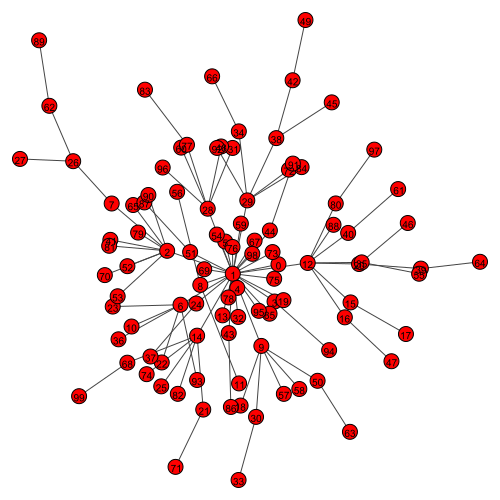

In [19]:
vs = igraph.VertexSeq(g)                                                  #Loads node attributes.
es = igraph.EdgeSeq(g)                                                    #Loads edge atrributes.
igraph.plot(g, "graph.png", vertex_size = 15, edge_width = 1, vertex_label = g.vs["_nx_name"], vertex_label_size=10, bbox = (500, 500))

# Community detection

In [22]:
G = nx.karate_club_graph()                                                 #Generates the famous Zachary Karate Club graph.
print(nx.info(G))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [23]:
g = igraph.Graph.from_networkx(G)

## 1. Girvan-Newman method (showcasing the main methods)

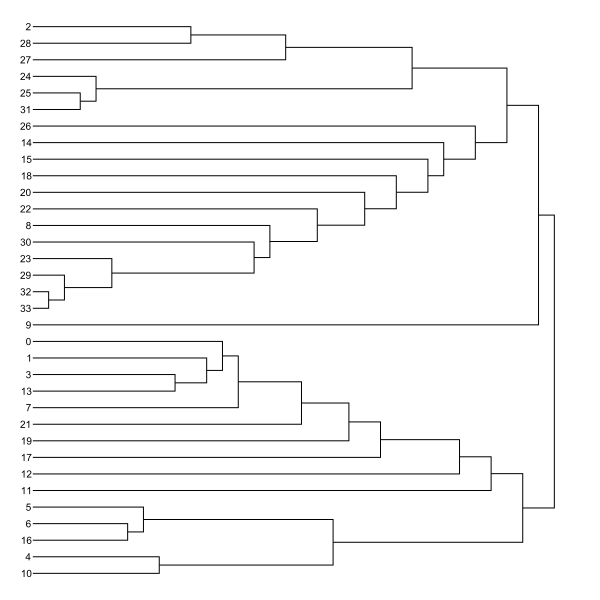

In [25]:
d = g.community_edge_betweenness()                                        #Does Girvan-Newman method.
igraph.plot(d)                                                            #Plots dendrogram.

In [32]:
ggirv = d.as_clustering()                                                     #Creates graph object from community finding clustering.
print(ggirv)                                                                  #Prints the community structure.
print("Modularity:", g.modularity(ggirv))                                     #Prints the modularity score.
print("Number of communities found:", max(ggirv.membership) + 1)              #Prints the number of detected communities.

Clustering with 34 elements and 5 clusters
[0] 0, 1, 3, 7, 11, 12, 13, 17, 19, 21
[1] 2, 24, 25, 27, 28, 31
[2] 4, 5, 6, 10, 16
[3] 8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33
[4] 9
Modularity: 0.40129848783694944
Number of communities found: 5


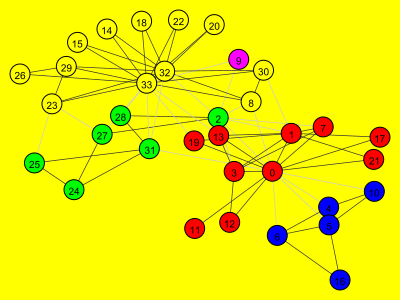

In [38]:
#The obtained graph that contains the communities can be passed into the plot. Edges between members of a community are wider.

vs = igraph.VertexSeq(g)
es = igraph.EdgeSeq(g)
igraph.plot(ggirv, vertex_size = 20, edge_width = 0.7, vertex_label = g.vs["_nx_name"], vertex_label_size=10, bbox = (400,300), background="yellow")

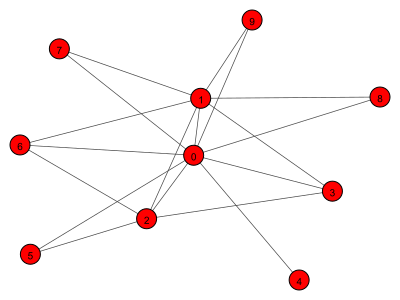

In [43]:
#You can plot the detected communities separately since they are subgraphs of the original one.

igraph.plot(ggirv.subgraph(0), vertex_size = 20, edge_width = 0.7, vertex_label = g.vs["_nx_name"], vertex_label_size=10, bbox = (400,300))

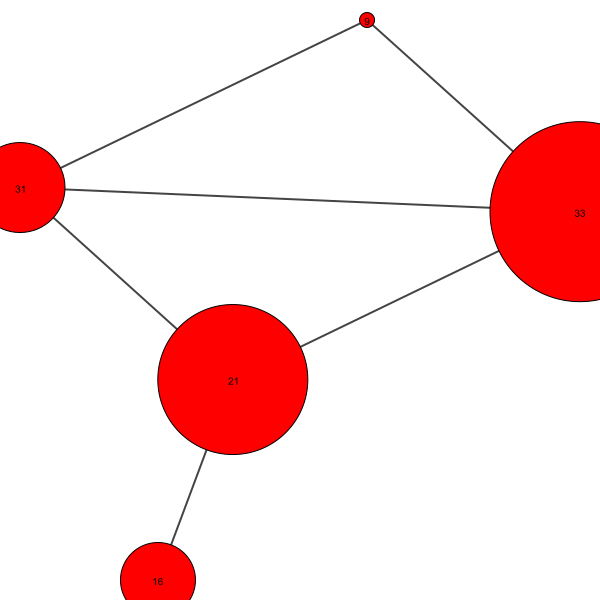

In [58]:
clustg = ggirv.cluster_graph(combine_vertices = "max")        #Creates nodes from communities. Provides good visualization while having thousands of nodes.
                                                              #Can also be made to inherit the attributes of the original graph. (Like here, it will give 
                                                              #the maximum of the node attributes in the given cluster.)
vs = igraph.VertexSeq(clustg)                                 #Loads in the attributes of the vertices of the clustered graph.
es = igraph.EdgeSeq(clustg)                                   #Loads in the attributes of the edges of the original graph.
vertexsize = []                                               #Stores the sizes of the clusters in a list.
for i in range(len(ggirv)):
    vertexsize.append(len(ggirv[i]))                          #Let the node size be 15 times the number of nodes the cluster contains.

igraph.plot(clustg, vertex_size = np.array(vertexsize) * 15, edge_width = 2, vertex_label = clustg.vs["_nx_name"], vertex_label_size=10, bbox = (600, 600)) 

## 2. Other community detection methods

Newman Eigen vector method: g.community_leading_eigenvector()

Label propagation: g.community_label_propagation()

Infomap method: g.community_infomap()

Louvain method: g.community_multilevel()

Leiden method: g. community_leiden(resolution_parameter = 0.00045)

Random walk method (walktrap): g.community_walktrap(steps = 18)

Fast-greedy method: g.community_fastgreedy()

    
Some of them immediately create an object like "ggirv", thus there is no need to use the as_clustering() function sometimes.